The purpose of this notebook is to plot and compare the normalized inter-class variance results of two separate files. There will be no checking to ensure the files being compared are of the same format (xmega/stm32 and unmasked/masked); it will be assumed that the user-entered parameters are correct. Much of this file will be similar to the "nicv_graph_generation" notebook and the corresponding tvla notebook.

The current implementation of this will be for only two datasets (down the line, the scope may change to include >2 datasets being compared).

Additional functions that are used in both this file and the NICV file are implemented in graphGenerationUtilities.py.

Below are descriptions of the input parameters:

- input_path_1: The directory containing the first csv file that will be used for plotting. Unlike other uses of an "input_parameter," this should include the file name itself. I.e, ensure the path to and including the file is passed.
- input_path_2: The directory containing the second csv file that will be used for plotting. Format is the same as what is mentioned for the above parameter.
- path_to_save_nicv_comparison: Path to save the plots to.
- overriding_max_y_tick_val: This is a boolean parameter that can override the max y-tick value. If True, the plot's y-axis ticks will be determined by the program. Otherwise, the max y-tick will be 1.

In [1]:
import os, sys
import pandas as pd
from math import floor, ceil

# setting the utilities required for loading the data and training the model
sys.path.append('../utilities/')
from graphGenerationUtilities import *

%load_ext autotime

2022-07-07 13:47:22.569580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-07 13:47:22.569599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


time: 194 µs (started: 2022-07-07 13:47:23 -04:00)


In [2]:
data_params = {
    "input_path_1": '/home/erc528/Downloads/target-byte-0-PC2.csv', # path to the first input file
    "input_path_2": '/home/erc528/Downloads/target-byte-0-PC1.csv', # path to the second input file
    "path_to_save_nicv_comparison": '/home/erc528/chipwhisperer/collected_data/comparison_results_channing', # path to save csv file containing time and t value
    "override_max_y_tick": True, # This parameter can be used to override the default max y-tick value of 1.
}

# The directory to save the files is created.
model_dir_path = data_params["path_to_save_nicv_comparison"]
if not os.path.isdir(model_dir_path):
    os.makedirs(model_dir_path)

time: 634 µs (started: 2022-07-07 13:47:23 -04:00)


In [3]:
# Both input files are read and converted to DataFrame objects.
nicv_1_df = read_csv_file_as_df(data_params["input_path_1"])
nicv_2_df = read_csv_file_as_df(data_params["input_path_2"])

# The x ticks are calculated. It is assumed that both dfs have the same num_time_samples
num_time_samples = nicv_1_df.shape[0]
time_samples_inc = num_time_samples//5
# The first time value is the start_idx + 1.
# For better formatting of the results, the x-ticks begin from one less than this.
first_time_val = nicv_1_df['time'][0]
x_ticks = list(range(first_time_val - 1, first_time_val + num_time_samples, time_samples_inc))

# The file and parent directory names are gotten from the path parameters.
nicv_file_name_1 = get_file_name_from_path(data_params["input_path_1"])
nicv_file_1_parent_dir = os.path.dirname(data_params["input_path_1"]).rsplit("/")[-1]
nicv_file_name_2 = get_file_name_from_path(data_params["input_path_2"])
nicv_file_2_parent_dir = os.path.dirname(data_params["input_path_2"]).rsplit("/")[-1]

# The plot labels are created based on the above variables.
nicv_label_1 = "{}_{}".format(nicv_file_1_parent_dir, replace_file_name_text(nicv_file_name_1, "NICV"))
nicv_label_2 = "{}_{}".format(nicv_file_2_parent_dir, replace_file_name_text(nicv_file_name_2, "NICV"))

# The file name is based on the labels.
f_name = "{}_{}".format(nicv_label_1, nicv_label_2)

time: 41.8 ms (started: 2022-07-07 13:47:23 -04:00)


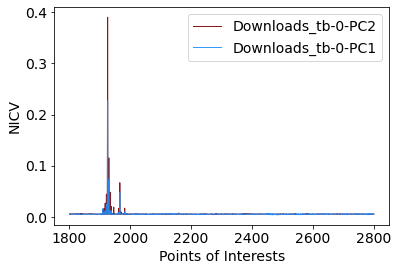

time: 208 ms (started: 2022-07-07 13:47:23 -04:00)


In [4]:
fig, ax = plt.subplots()
ax.plot(nicv_1_df['time'], nicv_1_df['nicv-value'], color='maroon', 
        linestyle='-', linewidth=1, alpha=0.9, label=nicv_label_1)

ax.plot(nicv_2_df['time'], nicv_2_df['nicv-value'], color='dodgerblue', 
        linestyle='-', linewidth=1, alpha=0.9, label=nicv_label_2)

legend_without_duplicate_labels(ax, loc="upper right")
plt.xlabel('Points of Interests')
plt.ylabel('NICV')
plt.xticks(x_ticks)
if not data_params["override_max_y_tick"]:
    plt.yticks([0, 1])

nicv_plot_path = os.path.join(data_params['path_to_save_nicv_comparison'], f_name + "-plot.png")
plt.savefig(nicv_plot_path, dpi=150, bbox_inches='tight')
plt.show()